# B13 Measuring the liquid acoustic velocity using ultrasonic grating method
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/09/30

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EXP1

In [7]:
df1 = pd.read_csv('B13-Data\spectrometer.csv', index_col='Angle')
df2 = pd.DataFrame()
lam = 589.3e-9
f = 10.64e+6

df2['theta1'] = (df1.loc['m1',] + df1.loc['s1',]/60)*np.pi/180
df2['theta2'] = (df1.loc['m2',] + df1.loc['s2',]/60)*np.pi/180
df2['theta'] = (df2['theta1'] + df2['theta2'] - np.pi)/2
df2

,theta1,theta2,theta
-3,1.735148,4.879068,1.736312
-2,1.730785,4.874414,1.731803
-1,1.726131,4.870050,1.727294
0,1.721767,4.865105,1.722640
1,1.717986,4.861615,1.719004
2,1.713622,4.856960,1.714495
3,1.708968,4.852597,1.709986


In [29]:
df3 = pd.DataFrame(columns=['theta'])
for i in np.arange(0, 7, 1):
    df3.loc[i] = [-(df2.iloc[i,2] - df2.iloc[3,2])]
df3['k'] = np.arange(-3 , 4, 1)
df3['sin'] = np.sin(df3['theta'])
df3

,theta,k,sin
0,-0.013672,-3,-0.013671
1,-0.009163,-2,-0.009163
2,-0.004654,-1,-0.004654
3,-0.000000,0,-0.000000
4,0.003636,1,0.003636
5,0.008145,2,0.008145
6,0.012654,3,0.012653


u = 1439.5653123599673


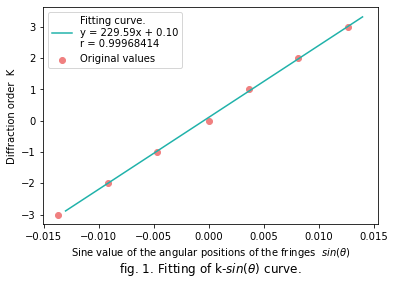

In [64]:
theta_func = np.polyfit(df3['sin'], df3['k'], deg=1)

sin_dns = np.linspace(-0.013, 0.014, 20)
k_reg = np.polyval(theta_func, sin_dns)

r = np.corrcoef(df3['sin'], df3['k'])[0,1]

A1, A2 = tuple(theta_func)
plt.scatter(df3['sin'], df3['k'], color='lightcoral', label='Original values')
plt.plot(sin_dns, k_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()   
plt.xlabel(r'Sine value of the angular positions of the fringes  $sin(\theta)$')
plt.ylabel('Diffraction order  K')
plt.title(r'fig. 1. Fitting of k-$sin(\theta)$ curve.', y=-0.25)
plt.savefig(r'B13-Output\fig.1.png', bbox_inches = 'tight', dpi=300)
u_exp1 = lam*f*A1
print('u = {}'.format(u_exp1))

## EXP2

In [52]:
df4 = pd.read_csv('B13-Data\micrometer_eyepiece.csv').T
F = 170E-3

df5 = pd.DataFrame(columns=['x'])
for i in np.arange(0, 7, 1):
    df5.loc[i] = [(df4.iloc[i,0] - df4.iloc[3,0])*1e-3]
df5['k'] = np.arange(-3 , 4, 1)
df5

,x,k
0,-0.002105,-3
1,-0.001400,-2
2,-0.000685,-1
3,0.000000,0
4,0.000735,1
5,0.001410,2
6,0.002105,3


u = 1517.232160382742


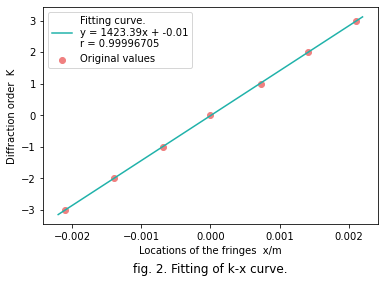

In [66]:
x_func = np.polyfit(df5['x'], df5['k'], deg=1)

X_dns = np.linspace(-0.0022, 0.0022, 20)
k_reg = np.polyval(x_func, X_dns)

r = np.corrcoef(df5['x'], df5['k'])[0,1]

A1, A2 = tuple(x_func)
plt.scatter(df5['x'], df5['k'], color='lightcoral', label='Original values')
plt.plot(X_dns, k_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()     
plt.xlabel('Locations of the fringes  x/m')
plt.ylabel('Diffraction order  K')
plt.title('fig. 2. Fitting of k-x curve.', y=-0.25)
plt.savefig(r'B13-Output\fig.2.png', bbox_inches = 'tight', dpi=300)
u_exp2 = lam*f*A1*F
print('u = {}'.format(u_exp2))

## Relative error

In [50]:
T = 27
u_the = 1404.3 + 4.7*T - 0.04*T**2
print('theoretical value : {}'.format(u_the))
print('Relative error of exp1 : {}'.format((u_the - u_exp1)/u_the))
print('Relative error of exp2 : {}'.format((u_the - u_exp2)/u_the))

theoretical value : 1502.04
Relative error of exp1 : 0.04159322497405708
Relative error of exp2 : -0.010114351403918692
